In [12]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
DataDir = r'D:\STUDY 3\soft computing\ASL project\images\asl_alphabet_train\asl_alphabet_train'

In [3]:
categories = ['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N',
              'nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z']

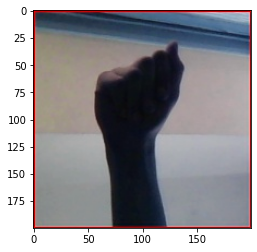

In [4]:
for cateogry in categories:
    path = os.path.join(DataDir,cateogry)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image))
        plt.imshow(img_array)
        plt.show()
        break
    break

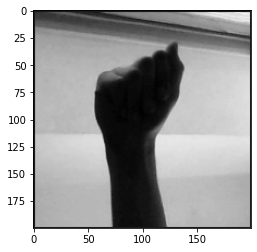

In [5]:
for cateogry in categories:
    path = os.path.join(DataDir,cateogry)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [6]:
print(img_array.shape)

(200, 200)


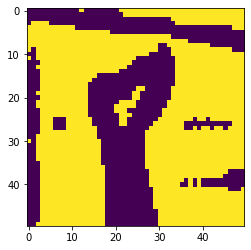

In [13]:
IMG_SIZE = 50
minValue=70
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
blur = cv2.GaussianBlur(new_array, (5, 5), 2)
th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)   
ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(res)
plt.show()

In [14]:
traing_data = []

def preproc(img):
    minValue=70
    blur = cv2.GaussianBlur(img, (5, 5), 2)
    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 13, 2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return res
    

def create_training_data():
    for category in categories:
        path =os.path.join(DataDir,category)
        Class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                new_array = preproc(new_array)
                traing_data.append([new_array,Class_num])
            except Exception as e:
                pass
            
            
create_training_data()

In [15]:
print(len(traing_data))

87000


In [19]:
import random
random.shuffle(traing_data)

In [20]:
for sample in traing_data[:5]:
    print(sample[1])

0
10
18
28
1


In [21]:
x = []
y = []

for feature , label in traing_data:
    x.append(feature)
    y.append(label)

In [22]:
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [23]:
import pickle

pickle_out = open('x3.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open('y3.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()
